In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/train.csv')
test= pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/test.csv')
store= pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/stores.csv')
holiday= pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/holidays_events.csv')
transactions = pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/transactions.csv')
oil= pd.read_csv('/Users/khushir/Documents/Class_Notes/Time Series/Project/store-sales-time-series-forecasting/oil.csv')

## Things to finish by Tuesday: 
2. Assumptions/Hypotheses about data and/or modeling
4. Data processing (anomaly detection, cleansing and imputations) and transformations
5. Feature engineering  
model evaluation results  
( have model code to upload on github)  
(~ 3 slides explaining your model & results)  

## Models:
Linda - TBATS  
Hongxuan - ARIMAX  
Khushi - SARIMA  
Cathy -

## My part:
top 3 stores' sales analysis (stores 44, 45, 47)  
SARIMA

In [2]:
from skimpy import skim

# Checking train dataset
train['date'] = pd.to_datetime(train['date'])
train['family'] = train['family'].astype(str)
train = train.drop(columns=['id']) # drop id as it is just row number
print(train.head())
skim(train)

# No missing values

        date  store_nbr      family  sales  onpromotion
0 2013-01-01          1  AUTOMOTIVE    0.0            0
1 2013-01-01          1   BABY CARE    0.0            0
2 2013-01-01          1      BEAUTY    0.0            0
3 2013-01-01          1   BEVERAGES    0.0            0
4 2013-01-01          1       BOOKS    0.0            0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 3000888 │ │ int64       │ 2     │                                                         │
│ │ Number of columns │ 5       │ │ datetime64  │ 1     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 1     │                                                         │
│                                 │ float64     │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0   ┃ p25   ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ store_nbr       │    0 │      0 │     27.5 │   15.59 │    1 │    14 │   27.5 │      41 │      54 │ ▇▇▇▇▇▇  │  │
│ │ sales           │    0 │      0 │    357.8 │    1102 │    0 │     0 │     11 │   195.8 │  124700 │    ▇    │  │
│ │ onpromotion     │    0 │      0 │    2.603 │   12.22 │    0 │     0 │      0 │       0 │     741 │    ▇    │  │
│ └─────────────────┴──────┴────────┴──────────┴─────────┴──────┴───────┴────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2013-01-01      │     2017-08-15      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ family                    │       0 │          0 │                          1.7 │                  5001480 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
# Checking test data set

test['date'] = pd.to_datetime(test['date'])
test['family'] = test['family'].astype(str)
test = test.drop(columns=['id']) # drop id as it is just row number
test['sales'] = np.nan
print(test.head())

        date  store_nbr      family  onpromotion  sales
0 2017-08-16          1  AUTOMOTIVE            0    NaN
1 2017-08-16          1   BABY CARE            0    NaN
2 2017-08-16          1      BEAUTY            2    NaN
3 2017-08-16          1   BEVERAGES           20    NaN
4 2017-08-16          1       BOOKS            0    NaN


# EDA

In [4]:
#EDA
# Check no. of stores
train['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [5]:
# Check top 5 performing stores
store_sales_best = train.groupby(['store_nbr'])['sales'].sum().reset_index()
store_sales_best = store_sales_best.sort_values(by=['sales'],ascending=False)
store_sales_best.head()

,store_nbr,sales
43,44,6.208755e+07
44,45,5.449801e+07
46,47,5.094831e+07
2,3,5.048191e+07
48,49,4.342010e+07


In [6]:
train_data = train[train['store_nbr'].isin([44, 45, 47])]
train_data['store_nbr'].unique()

test_data = test[test['store_nbr'].isin([44, 45, 47])]
test_data['store_nbr'].unique()

array([44, 45, 47])

In [7]:
train_data.columns

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

## Interpolation

In [31]:
import pandas as pd

# Ensure the 'date' column is in datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Split the train_data into three separate DataFrames for store_nbr 44, 45, and 47
store_44 = train_data[train_data['store_nbr'] == 44].sort_values(by='date').reset_index(drop=True)
store_45 = train_data[train_data['store_nbr'] == 45].sort_values(by='date').reset_index(drop=True)
store_47 = train_data[train_data['store_nbr'] == 47].sort_values(by='date').reset_index(drop=True)

/var/folders/w1/v4njbm6901vf5zflbcvdy17h0000gn/T/ipykernel_72305/4244031327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


In [11]:
def process_store_data(store_df):
    # Aggregate sales on duplicate dates by summing
    store_df = store_df.groupby('date').agg({'sales': 'sum', 'store_nbr': 'first'}).reset_index()
    
    # Create a full date range for the period
    full_date_range = pd.date_range(start='2013-01-01', end='2017-08-15')
    
    # Reindex the DataFrame to include the full date range
    store_df = store_df.set_index('date').reindex(full_date_range).sort_index()
    
    # Forward fill the sales column
    store_df['sales'] = store_df['sales'].ffill()
    
    # Fill store_nbr with the mode of the original column
    mode_store_nbr = store_df['store_nbr'].mode()[0]
    store_df['store_nbr'] = store_df['store_nbr'].fillna(mode_store_nbr)
    
    # Reset the index to bring 'date' back as a column
    store_df = store_df.reset_index().rename(columns={'index': 'date'})
    
    return store_df

In [36]:

# Apply the function to each store DataFrame
store_44 = process_store_data(store_44)
store_45 = process_store_data(store_45)
store_47 = process_store_data(store_47)

# Display the first few rows of each DataFrame to verify the results
print(store_44.head(10))
print(store_45.head(10))
print(store_47.head(10))

store_44.to_csv('store_44.csv')
store_45.to_csv('store_45.csv')
store_47.to_csv('store_47.csv')


        date         sales  store_nbr
0 2013-01-01      0.000000       44.0
1 2013-01-02  30095.181000       44.0
2 2013-01-03  20447.057000       44.0
3 2013-01-04  22795.799000       44.0
4 2013-01-05  31382.508000       44.0
5 2013-01-06  36069.345000       44.0
6 2013-01-07  21025.329000       44.0
7 2013-01-08  33993.257000       44.0
8 2013-01-09  21296.042004       44.0
9 2013-01-10  15522.827980       44.0
        date         sales  store_nbr
0 2013-01-01      0.000000       45.0
1 2013-01-02  27612.050950       45.0
2 2013-01-03  17377.980970       45.0
3 2013-01-04  19936.195040       45.0
4 2013-01-05  27104.223034       45.0
5 2013-01-06  31532.038020       45.0
6 2013-01-07  17309.963000       45.0
7 2013-01-08  14230.149000       45.0
8 2013-01-09  15477.240020       45.0
9 2013-01-10  10848.866000       45.0
        date         sales  store_nbr
0 2013-01-01      0.000000       47.0
1 2013-01-02  27263.111010       47.0
2 2013-01-03  18340.205000       47.0
3 2013-01-04

# Modeling

## Store 44

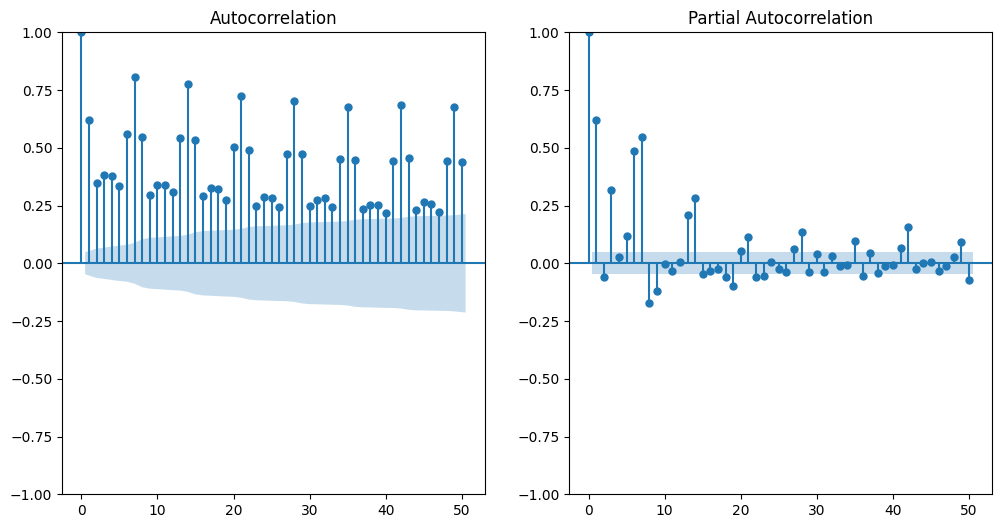

In [34]:
# Plot ACF and PACF
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(store_44['sales'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(store_44['sales'], lags=50, ax=plt.gca())
plt.show()


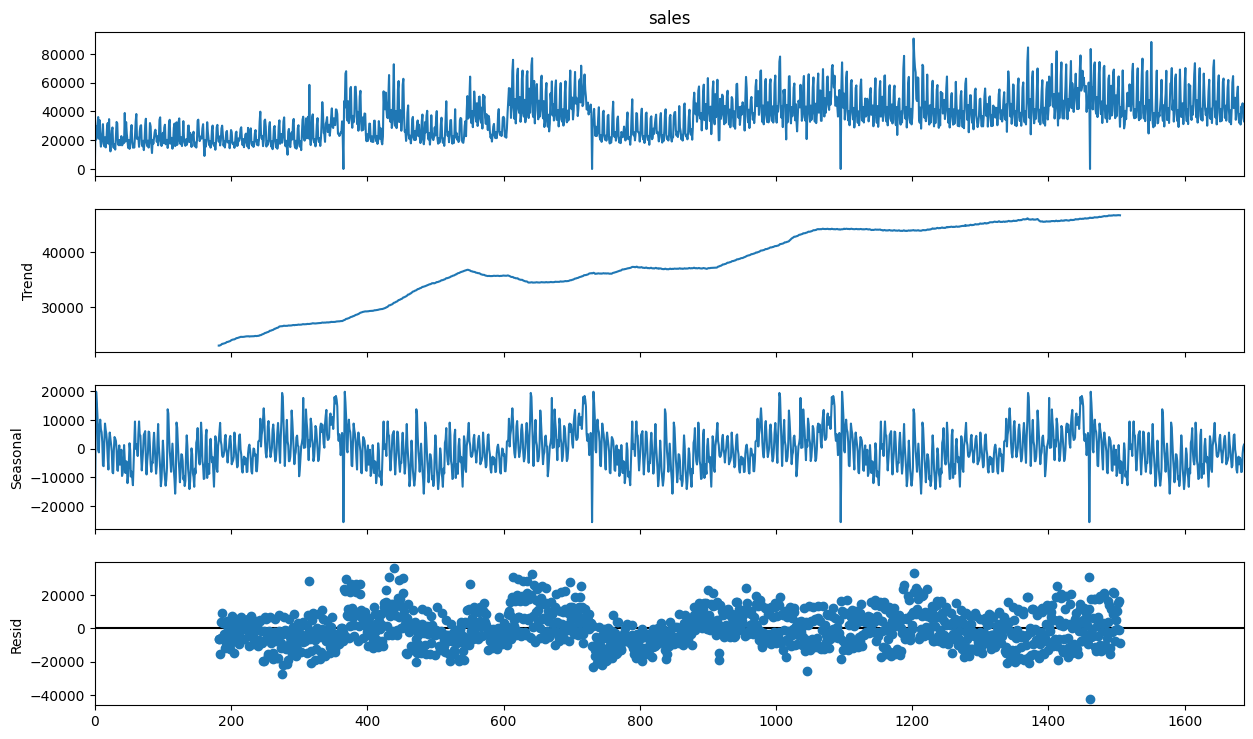

ADF Statistic: -3.0196276608236556
p-value: 0.033101636873603825
Critical Values:
   1%, -3.434283579780684
Critical Values:
   5%, -2.863277451883613
Critical Values:
   10%, -2.5676949772294817


In [62]:
# Check for Trend, Seasonality, and Stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Decompose the time series
decomposition = seasonal_decompose(store_44['sales'], model='additive', period=365)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(store_44['sales'])

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')
